In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def basis_function(i,p):
    
    N = np.zeros(u_len+1)
    if p ==0:
        for t,y in enumerate(N):
            if (U[i] <= u[t] and u[t] < U[i+1]) or (U[i] <= u[t] and u[t] <= U[i+1] and U[i] != U[i+1] and U[i+1] == 1) :
                N[t] = 1
            else:
                N[t] = 0
        return N
    else:
        if (U[i+p]-U[i]) < 1E-3:
            for t,y in enumerate(N):
                N[t] = basis_function(i+1,p-1)[t]*(U[i+p+1]-u[t])/(U[i+p+1]-U[i+1])
            return N
        elif (U[i+p+1]-U[i+1]) < 1E-3:
            for t,y in enumerate(N):
                N[t] = basis_function(i,p-1)[t]*(u[t]-U[i])/(U[i+p]-U[i]) 
            return N
        else:
            for t,y in enumerate(N):
                N[t] = basis_function(i,p-1)[t]*(u[t]-U[i])/(U[i+p]-U[i]) + basis_function(i+1,p-1)[t]*(U[i+p+1]-u[t])/(U[i+p+1]-U[i+1])
            return N
        
    

# Generating Basis Functions
## Set global variables

Make sure that len(U)= p + n + 1

In [3]:
#Knot vector, make sure that len(U)= p + n + 1.
U = np.array([0,0,0,1,1,1])

#degree of curve
p = 2

#number of control points
n = 3

#Gives the resolution of the functions, given the recursive and unoptimized 
#nature the function takes a while to produce results with larger resulutions
u_len = 40
u = np.linspace(0,1,u_len+1)

In [4]:
def produce_basis_functions(n,p,U):
    
    N_mat = np.zeros((n, u_len+1))
    for q in range(n):
        N_mat[q] = basis_function(q,p)
    return N_mat

In [5]:
#Function produces a matrix of basis functions. Basis_Functions[0] contains the values of the first basis function and so on
Basis_Functions = produce_basis_functions(n,p,U)


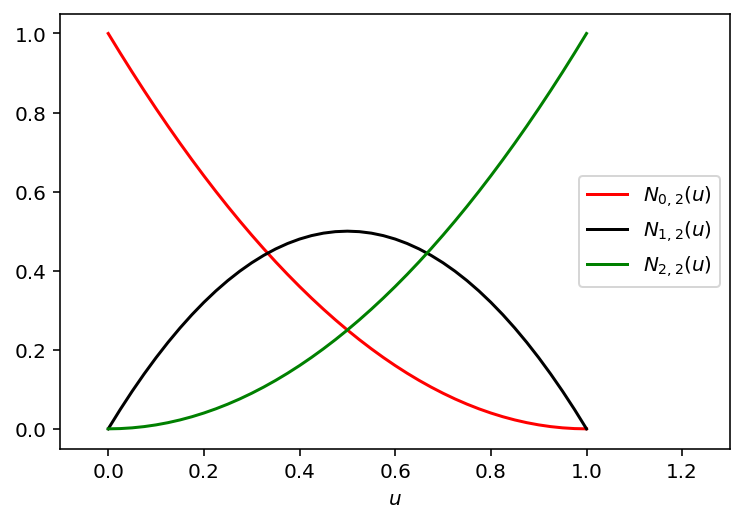

In [6]:
plt.figure(figsize=(6,4),dpi=144)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('axes', labelsize=10)
plt.plot(u,Basis_Functions[0], 'r', label="$N_{0,2}(u)$")
plt.plot(u,Basis_Functions[1], 'k', label="$N_{1,2}(u)$")
plt.plot(u,Basis_Functions[2], 'g', label="$N_{2,2}(u)$")
#plt.plot(u,Basis_Functions[3], 'm', label="$N_{3,2}(u)$")
#plt.plot(u,Basis_Functions[4], label="$N_{4,2}(u)$")
plt.legend()
plt.xlabel('$u$', size=10)

plt.xlim(-0.1, 1.3);
plt.savefig('BFp2n3.pdf', edgecolor='black', dpi=144, facecolor='white', transparent=True,pad_inches=0)

